In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.linalg import solve

In [2]:
rng = np.random.RandomState(0)
X_train = 15 * rng.rand(100, 1)
y_train = np.sin(X_train).ravel()
y_train += 3 * (0.5 - rng.rand(X_train.shape[0]))
X_test = np.linspace(0, 20, 10000)[:, None]

In [3]:
l = 2
p = 2*np.pi

In [4]:
def kernel(x1, x2):
    return np.exp(-2*np.sin(np.pi*cdist(x1, x2)/p)**2/l**2)

In [5]:
def GP_noise(X1, y1, X2, kernel_func, var_noise):
    # Code taken from lec.9 lecture note
    
    S11 = kernel_func(X1, X1) + np.eye(X1.shape[0])*var_noise
    S12 = kernel_func(X1, X2)
    
    solved = solve(S11, S12, assume_a='pos').T
       
    mu = solved @ y1
    S2 = kernel_func(X2, X2) - solved @ S12
    return mu, S2

In [6]:
mu, cov = GP_noise(X_train, y_train, X_test, kernel, 9/12)

In [7]:
s2 = np.sqrt(np.diag(cov))

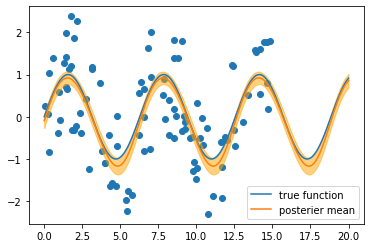

In [8]:
plt.scatter(X_train, y_train)
# plt.plot(X_test[:,0], y2[:,0])
plt.plot(X_test, np.sin(X_test), label='true function')
plt.fill_between(X_test[:,0], mu-s2, mu+s2, alpha=0.5, color='orange')
plt.plot(X_test, mu, label='posterier mean')
plt.legend()
plt.show()